# EDA - Exploring relationships in PHZ Project

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Cleaning and wrangling Data
#### 3. Exploring Relationships Through Correlations
#### 4. Visualizations of Data and Correlations
#### 5. Q&A, Hypothesis, Next Steps

## 1. Importing Visualization Libraries and Data


In [7]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [8]:
# define path
path = r"C:\Users\Noah\Achievement 6"

In [9]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned', 'df_corn_analysis.csv'))

In [13]:
df.head()

,Unnamed: 0,Year,County,State,Zip code,latitude,longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales ($),CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7b,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7b,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7b,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7b,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7a,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022


## 2. Cleaning and wrangling Data


In [15]:
# quick renaming 
df.rename(columns = {'Zip code' : 'Zip Code', 'latitude' : 'Latitude', 'longitude' : 'Longitude', 'Sales ($)' : 'Sales'}, inplace = True)

In [17]:
df.dtypes

Unnamed: 0                int64
Year                      int64
County                   object
State                    object
Zip Code                  int64
Latitude                float64
Longitude               float64
Plant Hardiness Zone     object
Corn Acres Harvested    float64
Sales                     int64
CV                      float64
State ANSI                int64
Ag District              object
Ag District Code          int64
Concatenated             object
dtype: object

In [20]:
# create a mapping function for converting Plant Hardiness Zone to number for correlation
def convert_alphanumeric(value):
    # Extract the numeric part and the letter part
    if pd.isna(value):
        return None  # Handle NaN values
    num_part = int(value[:-1])
    letter_part = value[-1].lower()
    
    # Create a mapping for letters
    letter_mapping = {'a': 0.1, 'b': 0.2}
    
    # Convert the value to a float
    return num_part + letter_mapping.get(letter_part, 0)

In [22]:
# converting to alphanumeric PHZ
df['Plant Hardiness Zone'] = df['Plant Hardiness Zone'].apply(convert_alphanumeric)


In [24]:
df.head(5)

,Unnamed: 0,Year,County,State,Zip Code,Latitude,Longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales,CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7.2,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7.2,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7.2,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7.2,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022


### ID outliers before charting

#### only need to search numeric for outliers

In [28]:
Q1 = df['Corn Acres Harvested'].quantile(0.25)
Q3 = df['Corn Acres Harvested'].quantile(0.75)
IQR = Q3-Q1
df['is_outlier'] = (df['Corn Acres Harvested'] < (Q1 - 1.5 * IQR)) | (df['Corn Acres Harvested'] > (Q3 + 1.5 * IQR))
print (df)

      Unnamed: 0  Year    County          State  Zip Code  Latitude  \
0              0  2022     CREEK       OKLAHOMA     74010     35.83   
1              1  2022     GRADY       OKLAHOMA     73002     34.92   
2              2  2022   MCCLAIN       OKLAHOMA     73010     35.14   
3              3  2022     PAYNE       OKLAHOMA     74023     35.97   
4              4  2022     MAJOR       OKLAHOMA     73718     36.24   
...          ...   ...       ...            ...       ...       ...   
5059        5293  2022   KANAWHA  WEST VIRGINIA     25015     38.23   
5060        5294  2022   LINCOLN  WEST VIRGINIA     25003     38.28   
5061        5295  2022   ASHLAND      WISCONSIN     54514     46.01   
5062        5296  2022   NATRONA        WYOMING     82601     42.83   
5063        5297  2022  NIOBRARA        WYOMING     82222     43.20   

      Longitude  Plant Hardiness Zone  Corn Acres Harvested    Sales   CV  \
0        -96.39                   7.2                 244.0    71000  

In [30]:
outliers = df[df['is_outlier']]
print(outliers)

      Unnamed: 0  Year           County      State  Zip Code  Latitude  \
57            57  2012         COLUMBIA  WISCONSIN     53555     43.31   
58            58  2012             DANE  WISCONSIN     53508     42.86   
59            59  2012            DODGE  WISCONSIN     53003     43.21   
62            62  2012             ROCK  WISCONSIN     53501     42.60   
71            71  2012            GRANT  WISCONSIN     53554     42.90   
...          ...   ...              ...        ...       ...       ...   
4128        4201  2022          STEVENS  MINNESOTA     56207     45.57   
4129        4202  2022            SWIFT  MINNESOTA     56208     45.20   
4132        4205  2022  YELLOW MEDICINE  MINNESOTA     56220     44.71   
4182        4260  2022       KIT CARSON   COLORADO     80805     39.30   
4186        4264  2022             YUMA   COLORADO     80727     40.11   

      Longitude  Plant Hardiness Zone  Corn Acres Harvested      Sales    CV  \
57       -89.53                

<function matplotlib.pyplot.show(close=None, block=None)>

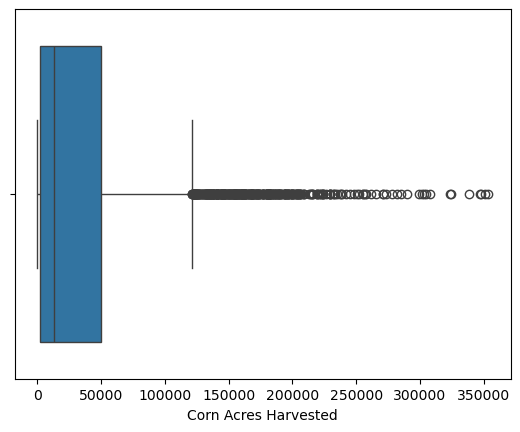

In [32]:
sns.boxplot(x=df['Corn Acres Harvested'])
plt.show

### In this instance, I will keep the outliers since megafarms like this are relevant to the investigation. It is plausible that there are farms that produce quantities this high to be considered outliers.

#### repeating with sales data

In [36]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3-Q1
df['is_outlier_sales'] = (df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))
outlier_sales = df[df['is_outlier_sales']]
print(outlier_sales)


      Unnamed: 0  Year     County      State  Zip Code  Latitude  Longitude  \
7              7  2022      TEXAS   OKLAHOMA     73901     36.75    -101.08   
57            57  2012   COLUMBIA  WISCONSIN     53555     43.31     -89.53   
58            58  2012       DANE  WISCONSIN     53508     42.86     -89.53   
59            59  2012      DODGE  WISCONSIN     53003     43.21     -88.52   
62            62  2012       ROCK  WISCONSIN     53501     42.60     -89.08   
...          ...   ...        ...        ...       ...       ...        ...   
4438        4522  2022      HURON   MICHIGAN     48413     43.80     -82.99   
4440        4524  2022    SANILAC   MICHIGAN     48401     43.35     -82.63   
4461        4545  2022     BRANCH   MICHIGAN     49028     41.87     -85.19   
4470        4554  2022  ST JOSEPH   MICHIGAN     49030     41.84     -85.32   
4473        4557  2022    LENAWEE   MICHIGAN     49220     41.98     -84.34   

      Plant Hardiness Zone  Corn Acres Harvested   

<function matplotlib.pyplot.show(close=None, block=None)>

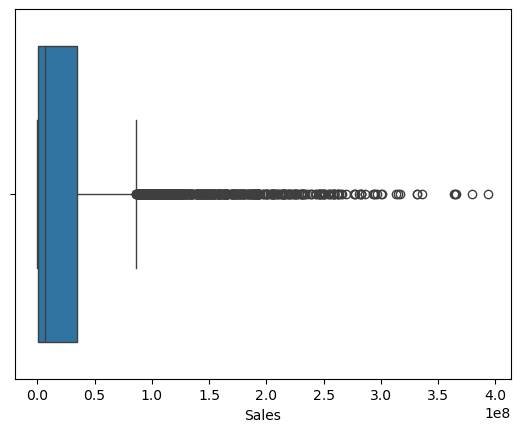

In [38]:
sns.boxplot(x=df['Sales'])
plt.show

### Very similar distribution to Corn Acres Harvested. Keeping outlier data for same reasons.

### check lat and long for outliers
#### anything outside of 24 and 50 for latitude and -67 and -125 for longitude (boundaries of US)

In [54]:
lower_bound_long = -125
upper_bound_long = -67

# Check if all values fall within the range
outside_range = df[(df['Longitude'] < lower_bound_long) | (df['Longitude'] > upper_bound_long)]
print(outside_range)

Empty DataFrame
Columns: [Unnamed: 0, Year, County, State, Zip Code, Latitude, Longitude, Plant Hardiness Zone, Corn Acres Harvested, Sales, CV, State ANSI, Ag District, Ag District Code, Concatenated, is_outlier, is_outlier_sales]
Index: []


In [60]:
lower_bound_lat = 24
upper_bound_lat = 50

# Check if all values fall within the range
outside_range_lat = df[(df['Latitude'] < lower_bound_lat) | (df['Latitude'] > upper_bound_lat)]
print(outside_range_lat)

Empty DataFrame
Columns: [Unnamed: 0, Year, County, State, Zip Code, Latitude, Longitude, Plant Hardiness Zone, Corn Acres Harvested, Sales, CV, State ANSI, Ag District, Ag District Code, Concatenated, is_outlier, is_outlier_sales]
Index: []


### no geographic outliers

In [68]:
print(df['Year'].unique())

[2022 2012]


### no outliers for year

## 3. Exploring Relationships Through Correlations

In [257]:
# creating numeric df for correlation analysis
columns = ['Year', 'Zip Code', 'Latitude', 'Longitude', 'Plant Hardiness Zone', 'Corn Acres Harvested', 'Sales', 'CV', 'State ANSI', 'Ag District Code']

In [258]:
df_cleaned = df[columns]


In [259]:
#checking current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Noah\\Achievement 6\\03 Scripts'

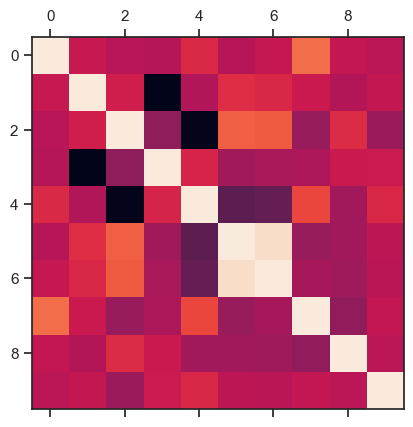

In [260]:
# save figure to current directory
# Save figure
plt.matshow(df_cleaned.corr())
plt.savefig("out.png") 

Text(0.5, 1.0, 'PHZ Correlation Matrix')

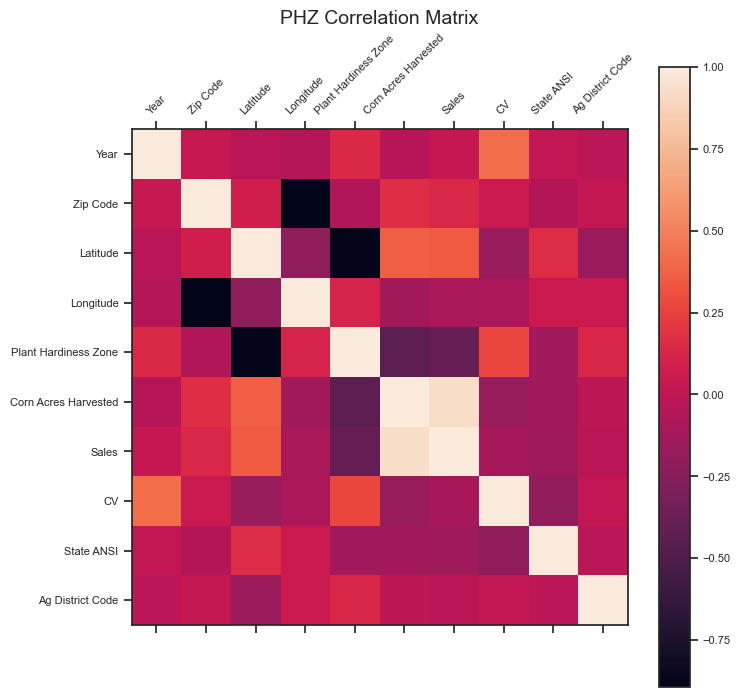

In [261]:
# Add labels, legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_cleaned.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('PHZ Correlation Matrix', fontsize=14) # add title

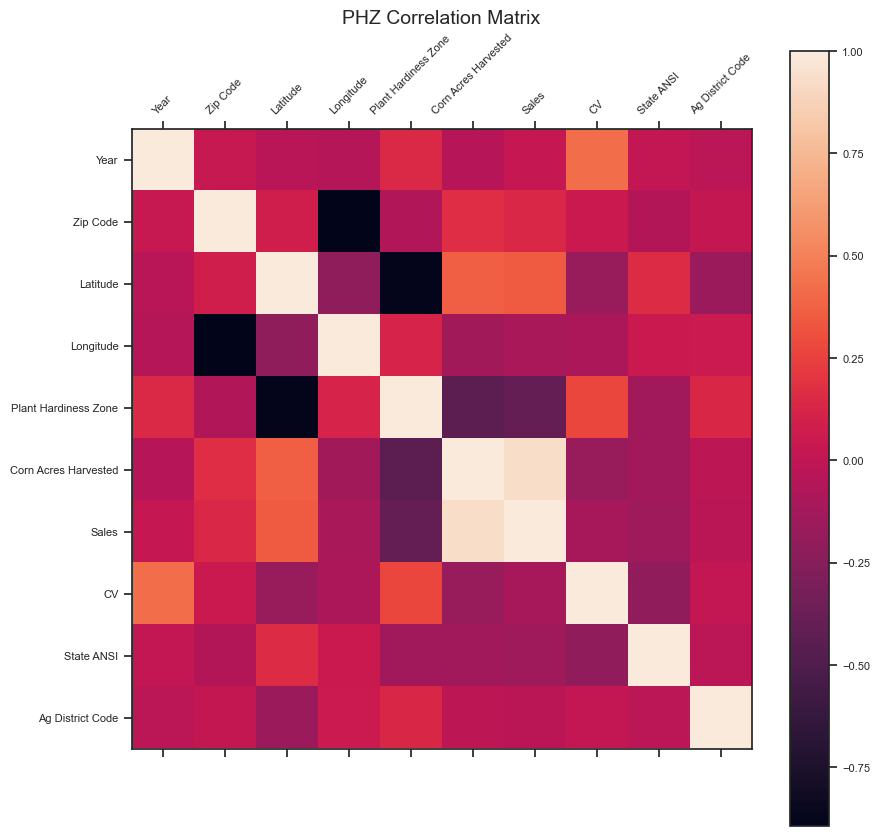

In [262]:
# fixing size

# Calculate the correlation matrix for the cleaned DataFrame slice
corr_matrix = df_cleaned.corr()

# Plot the heatmap
f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(corr_matrix, fignum=f.number) # type of plot

# Set x and y ticks to match the columns of the slice
plt.xticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=8) # y axis labels

# Add color legend (colorbar)
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=8) 

# Add title
plt.title('PHZ Correlation Matrix', fontsize=14)

# Show the plot
plt.show()

### the strongest correlation is between Sales and Corn Acres Harvested
    Unsurprising- more crops means more $
### there is a strong negative correlation between Latitude and Corn Acres Harvested
    colder climes indicates better production
### There is a strong negative correlation between Plant Hardiness Zone and Latitude
    smaller numbers means more northern

## creating heat map using seaborn

In [265]:
df.columns

Index(['Unnamed: 0', 'Year', 'County', 'State', 'Zip Code', 'Latitude',
       'Longitude', 'Plant Hardiness Zone', 'Corn Acres Harvested', 'Sales',
       'CV', 'State ANSI', 'Ag District', 'Ag District Code', 'Concatenated'],
      dtype='object')

In [266]:
df_cleaned

,Year,Zip Code,Latitude,Longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales,CV,State ANSI,Ag District Code
0,2022,74010,35.83,-96.39,7.2,244.0,71000,0.3,40,50
1,2022,73002,34.92,-97.77,7.2,3063.0,2834000,0.3,40,50
2,2022,73010,35.14,-97.65,7.2,3167.0,1941000,0.3,40,50
3,2022,74023,35.97,-96.76,7.2,401.0,237000,0.3,40,50
4,2022,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,40
...,...,...,...,...,...,...,...,...,...,...
5059,2022,25015,38.23,-81.53,7.1,5.0,2000,0.0,54,40
5060,2022,25003,38.28,-81.84,7.1,6.0,2000,0.0,54,40
5061,2022,54514,46.01,-90.49,4.1,1796.0,918000,0.0,55,20
5062,2022,82601,42.83,-106.32,5.1,638.0,1536000,0.0,56,40


In [267]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['Year', 'Zip Code', 'Latitude', 'Longitude','Plant Hardiness Zone', 'Corn Acres Harvested', 'Sales', 'CV', 'State ANSI', 'Ag District Code']]

In [268]:
sub


,Year,Zip Code,Latitude,Longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales,CV,State ANSI,Ag District Code
0,2022,74010,35.83,-96.39,7.2,244.0,71000,0.3,40,50
1,2022,73002,34.92,-97.77,7.2,3063.0,2834000,0.3,40,50
2,2022,73010,35.14,-97.65,7.2,3167.0,1941000,0.3,40,50
3,2022,74023,35.97,-96.76,7.2,401.0,237000,0.3,40,50
4,2022,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,40
...,...,...,...,...,...,...,...,...,...,...
5059,2022,25015,38.23,-81.53,7.1,5.0,2000,0.0,54,40
5060,2022,25003,38.28,-81.84,7.1,6.0,2000,0.0,54,40
5061,2022,54514,46.01,-90.49,4.1,1796.0,918000,0.0,55,20
5062,2022,82601,42.83,-106.32,5.1,638.0,1536000,0.0,56,40


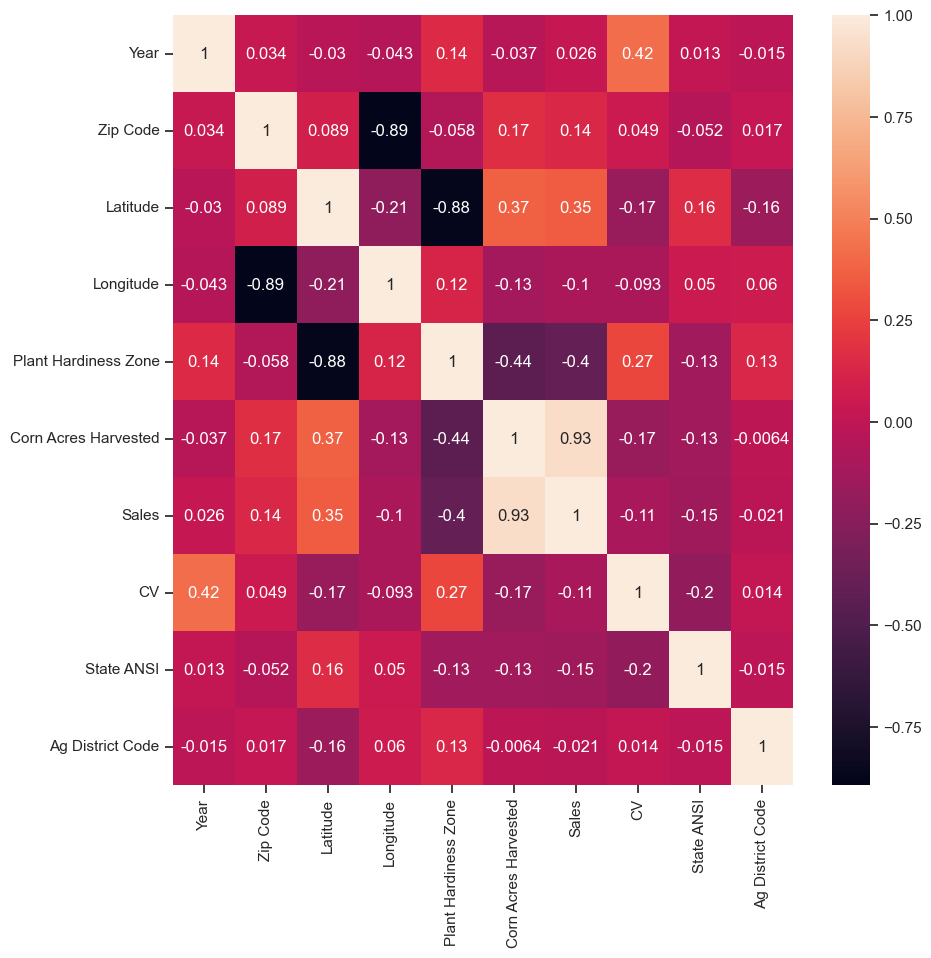

In [269]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_cleaned.corr(), annot = True, ax = ax)

# save figure to current directory
# Save figure
plt.savefig("out.png")
plt.show()

## 4. Visualizations of Data and Correlations

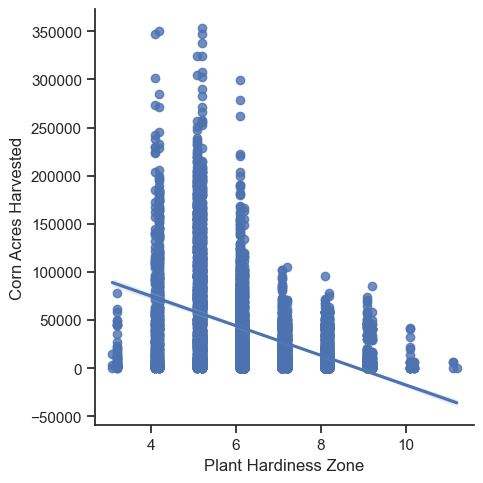

In [271]:
# Create a scatterplot for the "PHZ" and Corn Acres Harvested

sns.lmplot(x = 'Plant Hardiness Zone', y = 'Corn Acres Harvested', data = df)
plt.savefig("out.png")
plt.show()

### Zones 4 and 5 are best for corn production. Zone 3 is too cold, and zones 7+ are too hot

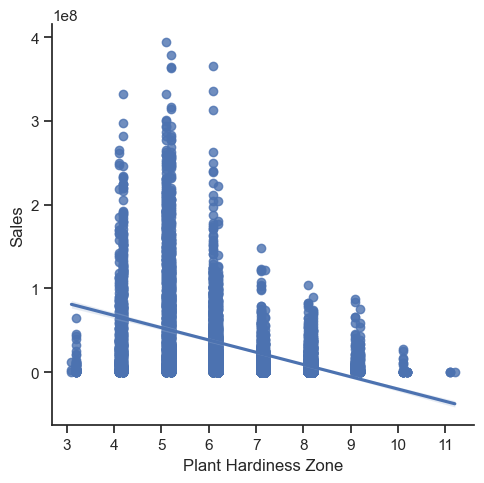

In [273]:
# Create a scatterplot for the "PHZ" and Sales

sns.lmplot(x = 'Plant Hardiness Zone', y = 'Sales', data = df)
plt.savefig("out.png")
plt.show()

### practically identical to PHZ vs Acres harvested scatter

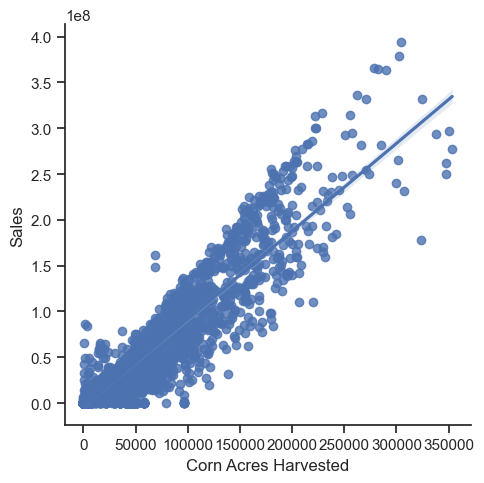

In [275]:
# Create a scatterplot for the Corn acres and sales


sns.lmplot(x = 'Corn Acres Harvested', y = 'Sales', data = df)
plt.savefig("out.png")
plt.show()

### more acres harvested = more sales

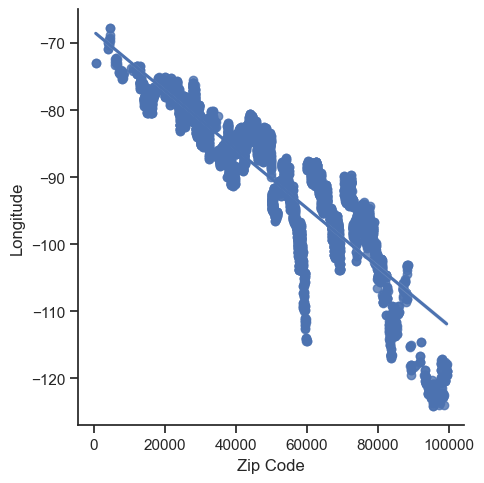

In [277]:
# creating a scatter for zip code and longitude
sns.lmplot(x = 'Zip Code', y = 'Longitude', data = df)
plt.savefig("out.png")
plt.show()

### it appears zip codes increase as the geographic location moves west. Makes sense since the US expanded westward

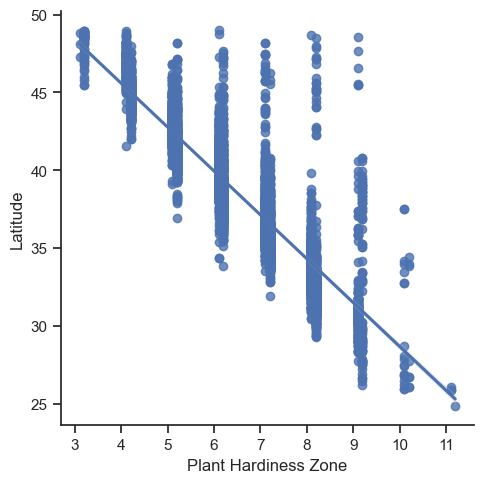

In [279]:
sns.lmplot(x = 'Plant Hardiness Zone', y = 'Latitude', data = df)
plt.savefig("out.png")
plt.show()


### closer to the equator means increase PHZ

### pair plot

In [282]:
# choosing variables 
sub = df_cleaned[['Corn Acres Harvested', 'Sales', 'Latitude', 'Plant Hardiness Zone']]

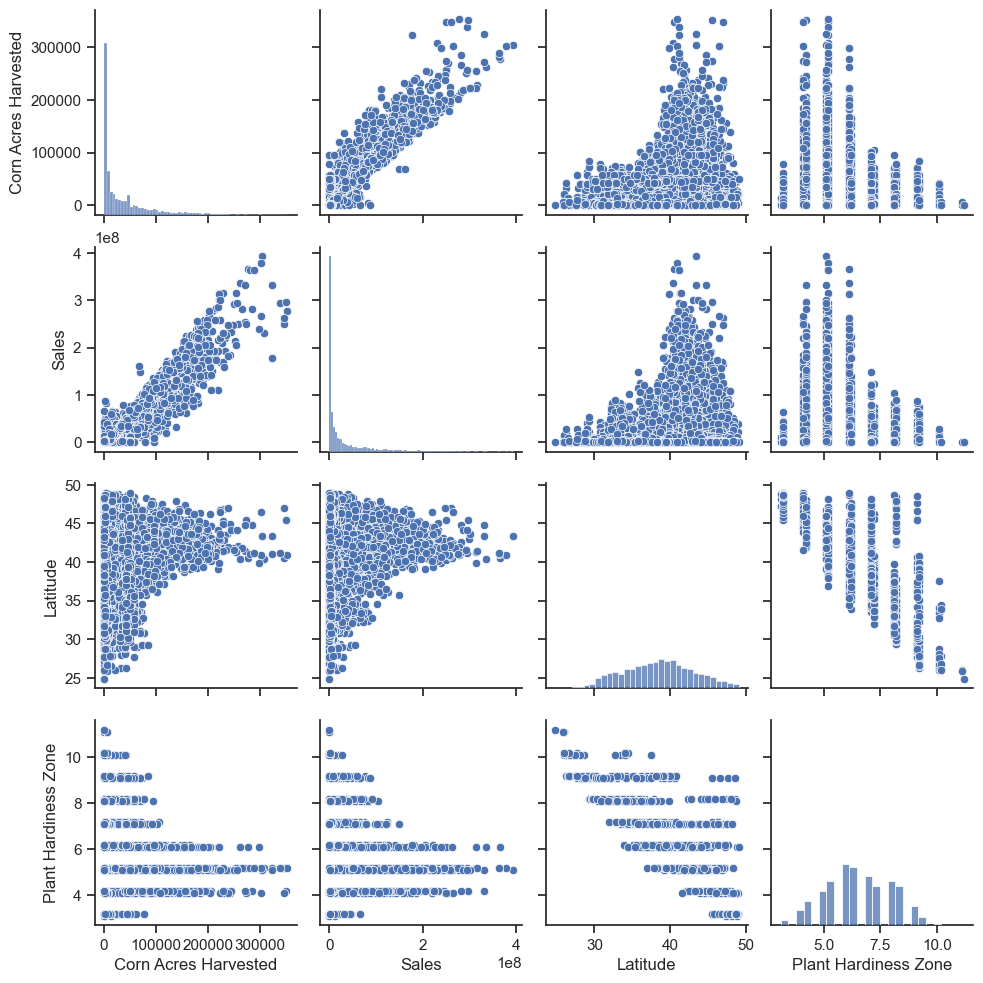

In [283]:
# Create a pair ploat 

g = sns.pairplot(sub)
plt.savefig("out.png")
plt.show()

### categorical plots:

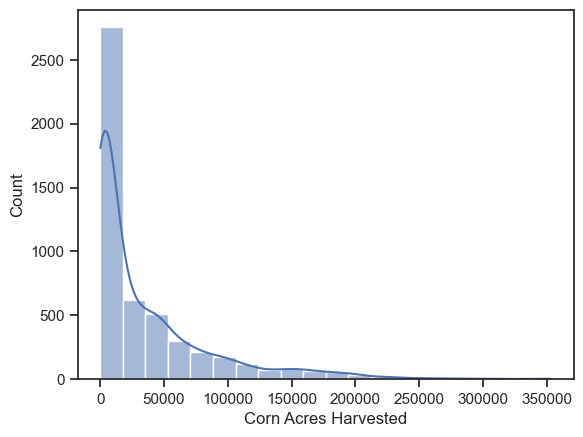

In [285]:
# Use a histogram to visualize the distribution of the variables. 


sns.histplot(df_cleaned['Corn Acres Harvested'], bins = 20, kde = True)
plt.savefig("out.png")
plt.show()

### defining categories

In [287]:
df.loc[df['Corn Acres Harvested'] < 50000, 'Harvest Category'] = 'Small Farm'

In [288]:
df.loc[(df['Corn Acres Harvested'] >= 50000) & (df['Corn Acres Harvested'] < 200000), 'Harvest Category'] = 'Mid-Sized Farm'

In [289]:
df.loc[df['Corn Acres Harvested'] >= 200000, 'Harvest Category'] = 'Large Farm'

In [290]:
df['Harvest Category'].value_counts(dropna = False)

Harvest Category
Small Farm        3836
Mid-Sized Farm    1151
Large Farm          77
Name: count, dtype: int64

In [291]:
df.columns

Index(['Unnamed: 0', 'Year', 'County', 'State', 'Zip Code', 'Latitude',
       'Longitude', 'Plant Hardiness Zone', 'Corn Acres Harvested', 'Sales',
       'CV', 'State ANSI', 'Ag District', 'Ag District Code', 'Concatenated',
       'Harvest Category'],
      dtype='object')

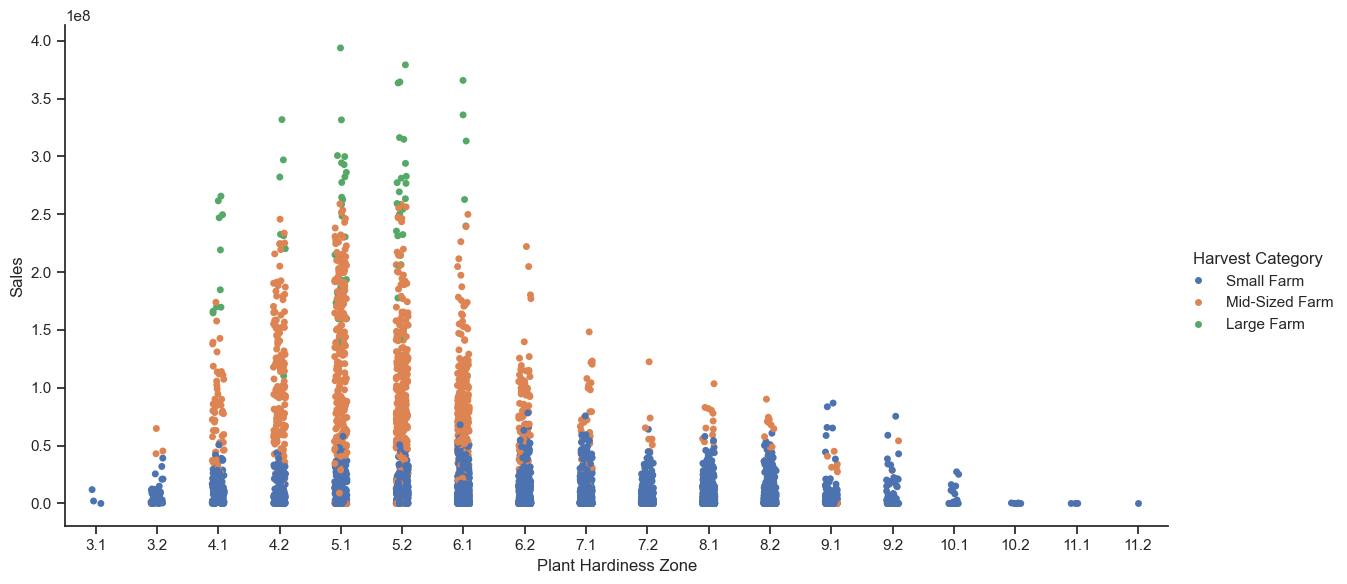

In [332]:
# Create a categorical plot in seaborn using the harvest categories created above

sns.set(style="ticks")
g = sns.catplot(
        x="Plant Hardiness Zone (.1 = A, .2 = B)",
        y="Sales", 
        hue="Harvest Category", 
        data=df,
        height = 6,
        aspect = 2
        )
g.set_titles("Sales by Plant Hardiness Zone and Harvest Category")

# Optionally customize other plot elements
plt.subplots_adjust(top=0.9)  # Adjust the top to make room for the title
# exporting:: fig = g.get_figure()
g.savefig("Sales by PHZ, farm size correlation.png") 
plt.show


### sales data shows that zones 4a (4.1) through 6a (6.1) have the highest levels of sales from corn harvests.
### Also, these zones are where large farms (>200K acres of corn harvested) are located.

In [293]:
# exporting:: fig = g.get_figure()
g.savefig("out.png") 


## 5. Q&A

#### What is the economic impact of shifting climates?
    We see that a shift in climates would redirect the areas in which corn is able to grow at large scale
#### Is corn a crop that is majorly affected by climate change?
    Yes, climate is a large factor in production. Corn is predominantly grown in zones 4 and 5 and somewhat in zone 6.
#### What regions, states, and counties are most likely to be affected by future changes to plant hardiness zones?
    Since the globe is warming, regions that are located at the northern edge of zone 4a will see more production
    Regions in zone 5b or 6a are likely to see a reduction in production.

## Hypothesis:

    I believe that the data will show that as climates warm across the US due to climate change corn production will increase in northern regions of the US and decrease in southern regions.

## Next Steps:
    Time analysis- the changes over time from 2002 to 2012 will give us an understanding of how quickly these changes are likely to arrive.